In [64]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

import pandas as pd



In [2]:
(train_image, train_label), (test_image, test_label) = load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_image.shape, train_label.shape, test_image.shape, test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(100, activation='relu'),
                    Dense(100, activation='relu'),
                    Dense(10, activation='sigmoid')
])

In [5]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics='sparse_categorical_accuracy')

In [6]:
history = model.fit(train_image, train_label, batch_size=32, epochs=5,
                    validation_data=(test_image, test_label))

Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 1.9168 - sparse_categorical_accuracy: 0.7241 - val_loss: 0.8243 - val_sparse_categorical_accuracy: 0.7127
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6592 - sparse_categorical_accuracy: 0.7775 - val_loss: 0.6801 - val_sparse_categorical_accuracy: 0.7650
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6172 - sparse_categorical_accuracy: 0.7944 - val_loss: 0.6015 - val_sparse_categorical_accuracy: 0.7746
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5676 - sparse_categorical_accuracy: 0.8121 - val_loss: 0.5951 - val_sparse_categorical_accuracy: 0.8112
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5129 - sparse_categorical_accuracy: 0.8265 - val_loss: 0.5020 - val_sparse_categorical_accuracy: 0.8296


In [7]:
print(model.evaluate(test_image, test_label))

313/313 [==============================] - 1s 2ms/step - loss: 0.5020 - sparse_categorical_accuracy: 0.8296
[0.5020167231559753, 0.8295999765396118]


In [8]:
## use tf.data
ds = tf.data.Dataset.from_tensor_slices((train_image, train_label))

In [9]:
history2 = model.fit(ds.batch(32).prefetch(tf.data.AUTOTUNE),
                      epochs=5,
                      validation_data=(test_image, test_label))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4675 - sparse_categorical_accuracy: 0.8382 - val_loss: 0.5319 - val_sparse_categorical_accuracy: 0.8210
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4409 - sparse_categorical_accuracy: 0.8451 - val_loss: 0.4868 - val_sparse_categorical_accuracy: 0.8313
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4228 - sparse_categorical_accuracy: 0.8514 - val_loss: 0.4486 - val_sparse_categorical_accuracy: 0.8490
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4082 - sparse_categorical_accuracy: 0.8539 - val_loss: 0.4455 - val_sparse_categorical_accuracy: 0.8493
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4010 - sparse_categorical_accuracy: 0.8577 - val_loss: 0.4500 - val_sparse_categorical_accuracy: 0.8486


In [10]:
import numpy as np
x = np.array([[1,2,3],[4,5,6]])

In [11]:
x.sum(axis=-1)

array([ 6, 15])

In [12]:
inputs = tf.keras.Input(shape=(784,))

In [13]:
inputs = tf.keras.Input(shape=(32, 32, 3))

In [14]:
inputs.shape

TensorShape([None, 32, 32, 3])

In [15]:
flatten = tf.keras.layers.Flatten()(inputs)
dense = tf.keras.layers.Dense(64, activation="relu")
x = dense(flatten)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(10)(x)

In [16]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [17]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                196672    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________


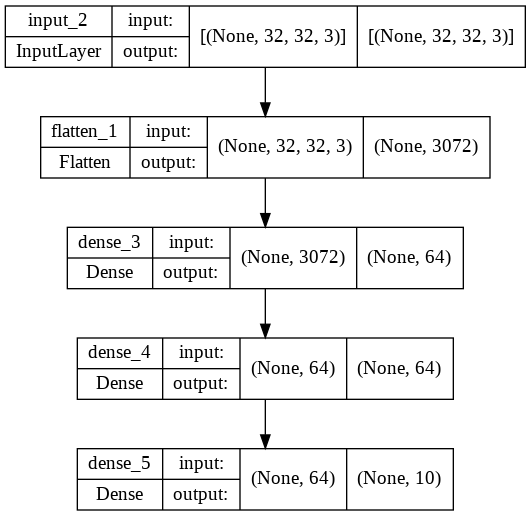

In [18]:
tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [19]:
(train_image, train_label), (test_image, test_label) = load_data()

In [20]:
test_image.shape

(10000, 28, 28)

In [21]:
train_image = train_image.reshape(60000, 784) / 255.
test_image = test_image.reshape(10000, 784) / 255.

In [22]:
train_label[0]

9

In [23]:
y_train=tf.one_hot(train_label,10)
y_test=tf.one_hot(test_label,10)
y_train[:3]

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [24]:
inputs = tf.keras.Input(shape=(None, 784, ))

In [25]:
dense = tf.keras.layers.Dense(64, activation="relu")
x = dense(inputs)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

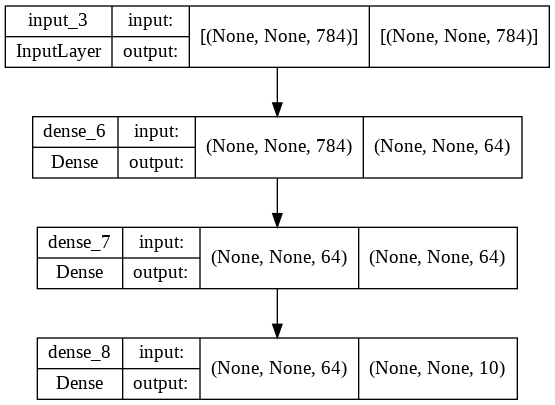

In [26]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [27]:
model.compile(optimizer='rmsprop',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])


In [28]:
history = model.fit(train_image, y_train, validation_data=(test_image, y_test), epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 7s 3ms/step - loss: 0.0961 - accuracy: 0.8086 - val_loss: 0.0825 - val_accuracy: 0.8360
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0689 - accuracy: 0.8616 - val_loss: 0.0712 - val_accuracy: 0.8593
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0630 - accuracy: 0.8732 - val_loss: 0.0674 - val_accuracy: 0.8676
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0601 - accuracy: 0.8807 - val_loss: 0.0716 - val_accuracy: 0.8657
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0590 - accuracy: 0.8847 - val_loss: 0.0739 - val_accuracy: 0.8483


In [29]:
y_train[:3]

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

New Model using Numerical Labels

In [30]:
(X_train, y_train), (X_test, y_test) = load_data()

In [31]:
X_train = X_train / 255.

In [32]:
X_test = X_test / 255.

In [33]:
y_test.max()

9

In [34]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [35]:
inputs = tf.keras.Input(shape=(28, 28))

In [36]:

flatten = tf.keras.layers.Flatten()(inputs)
flatten.shape

TensorShape([None, 784])

In [37]:
x = tf.keras.layers.Dense(64, activation="relu")(flatten)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

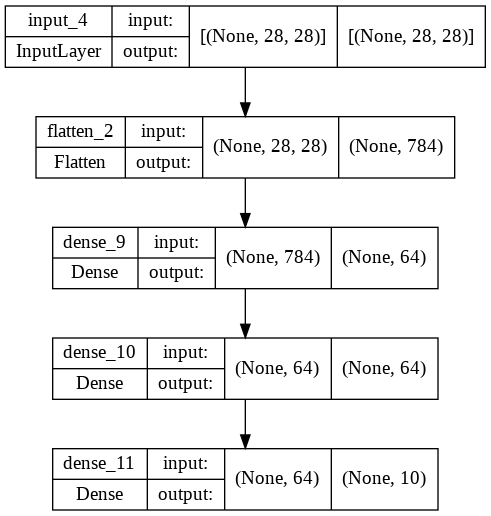

In [38]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [39]:
model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5181 - accuracy: 0.8140 - val_loss: 0.4562 - val_accuracy: 0.8436
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3848 - accuracy: 0.8609 - val_loss: 0.4256 - val_accuracy: 0.8518
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3564 - accuracy: 0.8724 - val_loss: 0.4236 - val_accuracy: 0.8536
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3390 - accuracy: 0.8788 - val_loss: 0.3996 - val_accuracy: 0.8631
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3309 - accuracy: 0.8820 - val_loss: 0.4034 - val_accuracy: 0.8685


### Another new model with CNN

In [56]:
(X_train, y_train), (X_test, y_test) = load_data()

In [57]:
X_train = X_train / 255.
X_test = X_test / 255.

In [58]:
X_train.shape

(60000, 28, 28)

In [68]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
          kernel_size=3, # can also be (3, 3)
          activation="relu", 
          input_shape=(28, 28, 1)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                       padding="valid"), # padding can also be 'same'
  # tf.keras.layers.Conv2D(10, 3, activation="relu"),
  # tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu'
  # tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax") # binary activation output
])

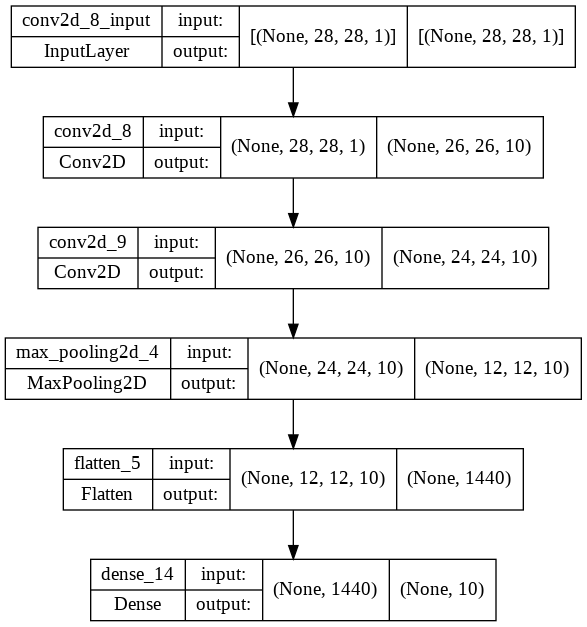

In [69]:
tf.keras.utils.plot_model(model_1, "my_first_model_with_shape_info.png", show_shapes=True)

In [70]:
model_1.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [71]:
history_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4845 - accuracy: 0.8292 - val_loss: 0.3940 - val_accuracy: 0.8603
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3395 - accuracy: 0.8814 - val_loss: 0.3312 - val_accuracy: 0.8838
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3020 - accuracy: 0.8950 - val_loss: 0.3087 - val_accuracy: 0.8910
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2806 - accuracy: 0.9021 - val_loss: 0.2965 - val_accuracy: 0.8962
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2659 - accuracy: 0.9076 - val_loss: 0.2885 - val_accuracy: 0.8987
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2538 - accuracy: 0.9114 - val_loss: 0.2876 - val_accuracy: 0.8971
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2451 - accuracy: 0.9154 - val_loss: 0.2767 - val_accuracy:

In [72]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

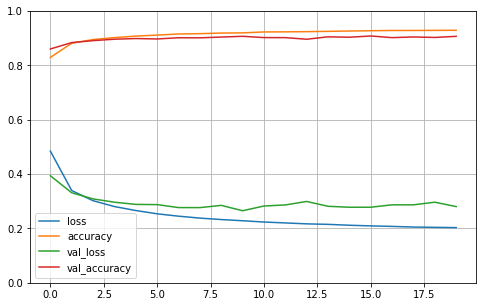

In [73]:
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


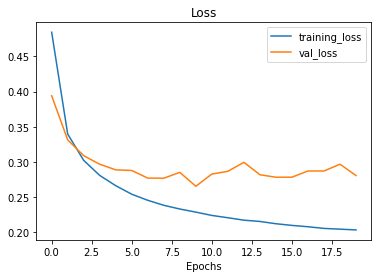

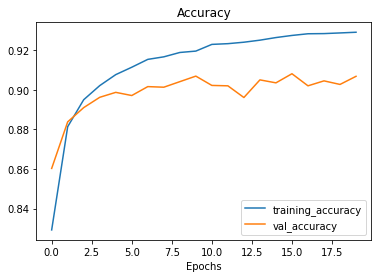

In [74]:
plot_loss_curves(history_1)

In [49]:
# do some preprocessing on images

9